## Introduction

Every science and engineering discipline relies on differentiation in some capacity, whether seeking to optimize system operations, deriving rates of change, or evaluating complex expressions. In this era of abundant computationally intensive tasks, evaluating gradients of any function (regardless of form) is both practical and valuable. The FADiff package addresses this task by automatically differentiating functions using forward mode. By implementing automatic differentiation (AD), which sequentially evaluates elementary functions, FADiff avoids the complexity of symbolic differentiation and the precision issues of numerical differentiation. Additional information on implementation is below.

## Background

Automatic Differentiation (AD) is a set of techniques for evaluating derivatives precisely based on computation graphs, chain rules and other symbolic rules. Compared with manual calculation or symbolic approach to calculating derivatives, it is highly convenient and fast since it frees users from tedius calculation and proof. Compared with finite approximation (a.k.a numerical differentiation), it is more accurate in that it avoids truncation errors or rounding-off errors that might arouse in symbolic differentiation when selecting a huge step (h) or a tiny step (h). (We've analyzed this point in HW4.). Due to these advantages, it has been widely used in scientific computing, machine learning, deep learning, etc. 

The mathematical background knowledge mainly includes matrix-vector product, Jacobian matrix, the algegra of dual numbers, Taylor's series expansion, higher-order derivatives, etc. We will discuss them in more details later. There are 2 evaluation modes in AD, **forward mode** and **reverse mode**.

1. Forward mode performs the operation of evaluating the numerical derivative concurrently with evaluating the function itself on a computational graph.

2. Reverse mode is an alternative to the forward mode. It uses the computation graph in forward mode to calculate the final output and then traveres reversely to perform to operation of evaluating derivatives. This mode is commonly used in deep learning and neural networks, in which it is also called backpropogation. 




### 1. Matrix-vector Products
##### 1.1 Definition 
   Given an $m\times n$  matrix $A_{m\times n}$ and a vector $x\in R^{n}$, there is a way to create a linear combination
   $$x_1a_1 + x_2a_2 + ... + x_na_n \in R^m $$ using the columns $a_1, . . . , a_n$ of $A$, where $x=\left[x_1,x_2,...,x_n \right]^{T}$.

##### 1.2 Notes
1. Matrix-vector products are only valid when the sizes of the matrix and vector are compatible – the number of elements of vector $x$ must equal the number of columns of matrix $A$. The number of elements in the output vector must equal to the number of rows in matrix $A$.
2. We can interpret the matrix-vector products as creating a linear transformation or a **map** from $R^n$ to $R^m$

### 2. Two Evaluation Mode: Forward & Reverse, Jacobian Matrix.
Automatic Differentiation (AD) can be applied on both scalar functions with one variable or functions with multiple variables. The derivative calculation of a single variable is super straight forward, while in the situations with multiple
variables, we will introduce a terminology called Jacobian Matrix ($J$).


Let's start from a general case with $x$ is a vector)

##### 2.1 Jacobian Matrix
If f is a matrix of multiple functions with multiple input variables, then denote $f$ as 
$$f=\begin{bmatrix} f_1(x,y) \\ f_2(x,y) \end{bmatrix}$$
Then, the derivative of matrix f is called Jacobian Matrix $J$:
\begin{align*}
  J = 
  \begin{bmatrix}
    \partial f_{1} / \partial x & \partial f_{1} / \partial y \\
    \partial f_{2} / \partial x & \partial f_{2} / \partial y
  \end{bmatrix}
\end{align*}

##### 2.2 Forward Mode
A program can be written as a combination of several functions: $f = f_1 ◦ · · · ◦ f_n$, let's set x_0 is a vector in $R^n$, $x_n$ is the output vector, each $f_i$ is the transaction function (a generalized "matrix" from the definition of matrix-vector products), then 
$$x_1 = f_1x_0$$
$$x_2 = f_2x_1$$
$$...$$
$$x_n=f_nx_{n-1}.$$
From the chain rule, we have:
$$ \dot{x_1} =  (J f_1 x_0)\tag{1}$$
$$ \dot{x_2} =  (J f_2 x_1) \times \dot{x_1}\tag{2}$$
$$ ... $$
$$ \dot{x_n} = (J f_n x_{n-1})\times \dot{x_{n-1}}\tag{n}. $$

The above process of evaluating derivatives is called **forward mode Automatic Differentiation**.




##### 2.3 Reverse Mode
If we take transpose on both left and right sides of equation (1),(2)...(n) above, then 
$${x_1}^\prime = (f_1x_0)^T$$
$${x_2}^\prime = (f_2x_1)^T$$
$$...$$
$${x_n}^\prime = (f_nx_{n-1})^T.$$
From the chain rule, we have:
$$ {x_{n-1}}^\prime =  (J f_n x_{n-1})^T$$
$$ {x_{n-2}}^\prime =  (J f_{n-1} x_{n-2}) \times {x_{n-1}}^\prime $$
$$ ... $$
$$ {x_0}^\prime = (J f_1 x_0)\times {x_1}^\prime. $$

The above process of evaluating derivatives is called **reverse mode Automatic Differentiation**.




##### 2.4 Example of computational graph, forward and reverse mode.

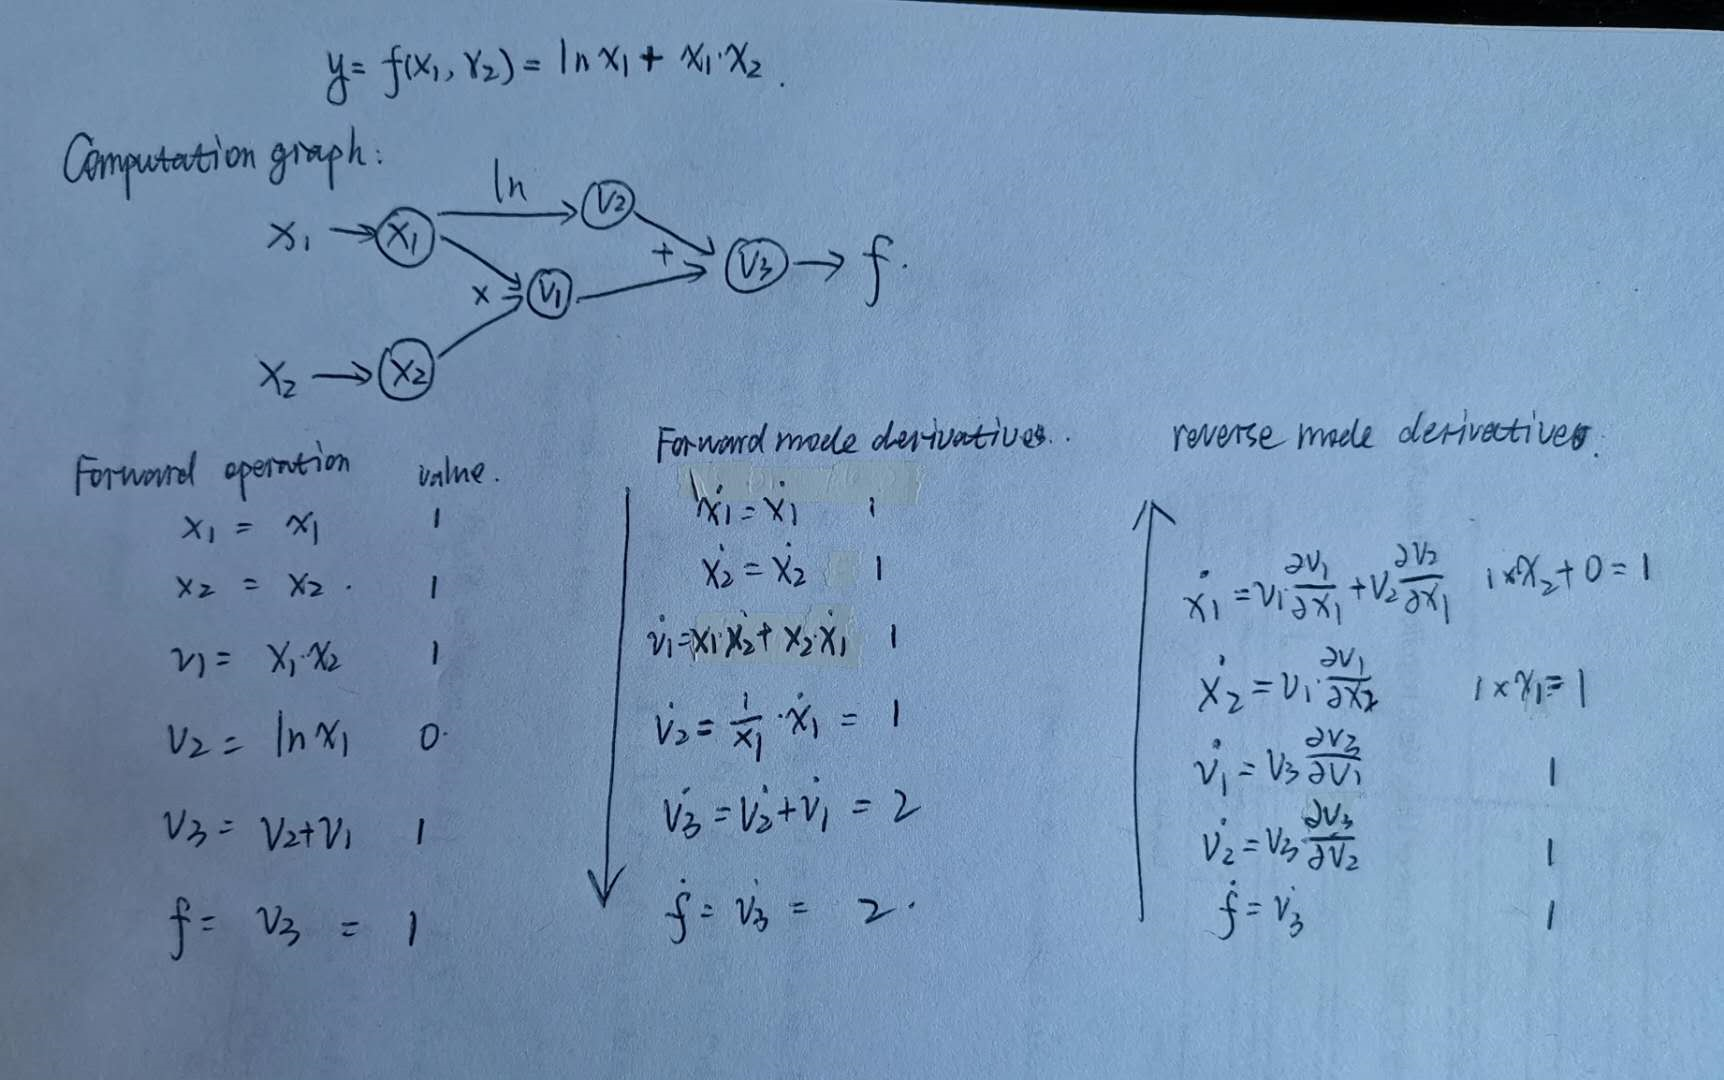


##### 2.5 When to use reverse or forward mode?

The difference between forward and reverse mode lies in the start point of matrix multiplication. 
From the view of the times of multiplication operation, when the dimension of input is less than that of the output, forward mode has less multiplication operations than reverse mode; comparably, when the dimension of input is more than that of the output, reverse mode has less multiplication operations. 
Therefore, when the dimension of input is less than that of the output, forward mode is more efficient; when the dimension of input is more than that of the output, reverse mode is more efficient. 

### 3. The algebra of dual number 
##### 3.1 Definition
A dual number (z) is composed of a real part (a) and a dual part (b).  We denote it as $$z = a + \epsilon b$$.

##### 3.3 What's the effect of dual numbers on derivatives? 
The usage of dual number augments the arithmetic in real number space to any input and allows the user to get the derivatives without calculating them. A function f(x) where x is a dual number can be re-written in a dual number format, where the real component is the function and dual component contains the derivative (as we discussed in lecture 10).

Generally, let $\hat f$ denotes the expansion of real-value function $f$ to dual number space, then
$$ \hat f(x_1+x_1^\prime\epsilon, ..., x_n + x_n^\prime\epsilon):=f(x_1,...,x_n)+\dot f(x_1,...x_n) \left(\begin{array}{c}
    x_1^\prime\\ 
    .\\
    .\\
    .\\
    x_n^\prime\\
  \end{array}\right)\epsilon $$

If $f$ is a matrix of multiple differentiable functions, then we can extend the above framework by replacing $\dot f(x_1,...x_n)$ with $J f (x_1,...,x_n)$


### 4. Elemental functions

Automatic Differentiation relies on the fact that we've already know the derivative at each step. So, we need some elemental functions. A function is called elemental function if it always returns the same result for same argument values and it has no side effect like modifying a global variable, etc. The result of calling a elemental function is the exact return value. 
Some examples are pow(), mean(), sqrt(), while printf(), rand() and time() are not elemental functions.


## How to use FADIFF


We expect the use of our package, `FADiff`, to be largely through its API. Where necessary or practical, our API may permit the use of objects and functions from NumPy or other widely-used external libraries. However, for certain areas of our implementation, we expect our package to require the exclusive use of internally defined objects and functions. For example, we might prohibit users from using external libraries for elementary functions (e.g., sin and cos) and only allow them to use our package’s implementations for such functions. This may help to reduce the potential for issues further on in the development process such as disuse or misuse of our package’s operator-overloaded functions, among other things. We will be clear in our documentation on how the user should use our package’s API including the proper use of variables and methods. Nonetheless, only one header should be needed to import and use our entire package. An example demonstrating the use of our package in pseudocode is shown below:

```
from fadiff.FADiff import AutoDiff as AutoDiffClassAlias     # Imports our package

ad = AutoDiffClassAlias()                    # Instantiate an AD class instance
f_x = x - ad.exp(-2.0 * ad.sin(4.0 * x))     # Defines a function f(x)
f_prime = ad.get_derivative(f, point)        # Calculates f’ at given point using AD
sin_x = ad.sin(x)                            # Calculates sin of x
sin_prime_x = ad.sin_dot(x)                  # Derives sin of x
```


## Software Organization

### 1. What will the directory structure look like?
We anticipate the direcotry strucutre to look something like:
```
cs107project/
    src/
        FADiff/
            FADiff.py
            ElemDerivs.py
    includes/
    docs/
    tests/
    examples/
    README.md
    LISCENSE.md
    .travis.yml
    setup.py
```
### 2. What modules do you plan on including? What is their basic functionality?
Our FADiff package will contain a module named `FADiff.py` and another called `ElemDerivs.py` (short for “elementary derivatives”). `FADiff.py` will contain our main automatic differentiation class and `ElemDerivs.py` will contain functions that calculate the derivatives of all the elementary functions our package supports such as sin and cos. `FADiff.py` will import `ElemDerivs.py` so that it can use its functions. We also plan to use external module dependencies like NumPy or similar for handling matrices, vectors, and other linear algebra data types as well as for our calculations. As explained in the “How to Use FADiff” section earlier in this document, our implementation may need to limit the use of external packages or only use them internally (i.e., hidden from the API) in certain areas.

### 3. Where will your test suite live? Will you use TravisCI? CodeCov?
We will use TravisCI to run tests which will live in the `/tests` directory of the project. 
### 4. How will you distribute your package (e.g. PyPI)?
We are aiming to distribute through PyPI if time permits. 
### 5. How will you package your software? Will you use a framework? If so, which one and why? If not, why not?
We won't be packaging the software using any sort of framework. The code will be clonable and installable via GitHub and via PyPI if time permits.
### 6. Other considerations?
After finishing Homework 4 and some upcoming lectures on various software topics such as containers, we may consider revising our software organization later on.

## Implementation
### 1. What are the core data structures?
We plan to use a list as our main data structure to hold the nodes (intermediate steps) including input parameters and output functions of an evaluation trace. An element in the list would represent one node in a trace and may be a list itself or perhaps an instance of a class. It would also contain pertinent data for that particular node including what parent or child nodes it has if any. We are also considering using a tuple to hold data that are handled together in forward mode such as the value of an elementary function at an intermediate step and the value of its derivative. Other data structures we plan to use include a NumPy array, int, and float. Furthermore, we may discover uses for other data structures that could supplant or augment parts of our implementation later on such as a tree, hash map, or dictionary.

### 2. What classes will you implement?
We will implement an automatic differentiation class. We are also considering creating a class to represent a node in the evaluation trace of the forward mode if needed.

### 3. What method and name attributes will your classes have?
We are aiming to only (or mainly) utilize one automatic differentiation class tentatively called AutoDiff in our package. This class’ attributes and methods will resemble the following pseudocode:
```  
def __init__():
    self.parameters = {‘seed’: None, ‘jacobian’: None, ‘functions’: None,
                       ‘input_values’: None, ‘output_values’: None}
def parse(function):
def get_derivative(function, point):
def dunder methods:
def elementary function methods:
def elementary function derivative methods:
def getters and setters:
```
We plan to have a `parameters` instance attribute that is a dictionary for persisting values including our seed vector.
The `parse` method parses the given function for use in our package’s calculations. This may not be a needed method as we are hoping that our operator-overloading functions can handle parsing for us by design. If we do find a need for it later on, we may actually put this functionality in a class of its own and define variables inside it and so forth.
The `get_derivative` method returns the derivative of the given function at the given point. Our implementation will provide a default seed value if the user doesn’t include one in as an argument.
The `dunder` methods will be used for operator overloading so that our package’s objects can work with mathematical and any needed operations.
The `elementary function methods` will be used for all the elementary functions supported by our package.
The `elementary function derivative methods` will be used to derive the elementary functions supported by our package (using ElemDerivs.py).
The `getters and setters` will be useful for many things such as accessing and changing the seed value, or returning a particular node in the evaluation trace.
We will also clarify with our client, David, what the requirements are for certain tasks such as how to handle the seed value.

### 4. What external dependencies will you rely on?
We will use NumPy for linear algebra data types like matrices and vectors as well as for our calculations. We are considering also using Sphinx for auto-rendering and organizing our documentation.

### 5. How will you deal with elementary functions like sin, sqrt, log, and exp (and all the others)?
Our implementation’s API would contain functions for evaluating all of the elementary functions our package supports which could involve operator overloading. Internally (i.e., hidden from the API), these functions will utilize NumPy or a similar external library for the evaluation of elementary functions. Additionally, we will create our own functions for calculating derivatives of elementary functions in our ElemDerivs.py module as explained earlier in this document. If a function is not supported by our API or implementation then our package won’t be able to recognize it and an error will be raised if such a function is used.


## Feedback

### Milestone 1

#### Comment

Good job! Consider using a different data structure apart from list for your main data structure. You may want to use something a bit more robust and structured i.e. dictionary, tree, hashmap. Hopefully the upcoming homework will give you all a bit of insight into the functionalities/pros and cons of a data structure like a BST

Oluwatosin Alliyu , Oct 27 at 9:27pm

#### Group Response

Per Oluwatosin’s feedback, we are considering a dictionary or a tree-like structure as our main data structure for our evaluation trace. Due to the binary nature of primitive operations (i.e., two inputs produce an output), we hope a tree could possibly be used in that respect. Each node in a trace will have an elementary function value and its derivative. If we use a dictionary it will allow us to add a key-value pair where the key is the name of the node and the value is a tuple in which the first element will be the elementary function’s value and the second, its derivative. We would greatly appreciate advice or direction as to whether a tree or a dictionary would best satisfy our use case.
